In [12]:
%matplotlib inline
import fipy as fp
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

mesh = fp.PeriodicGrid2D(nx=40, ny=40, dx=0.5, dy=0.5)


c_alpha = 0.05
c_beta = 0.95
A = 2.0
kappa = 2.0
c_m = (c_alpha + c_beta) / 2.
B = A / (c_alpha - c_m)**2
D = D_alpha = D_beta = 2. / (c_beta - c_alpha)
c_0 = 0.45
q = np.sqrt((2., 3.))
epsilon = 0.01
vals = np.linspace(-.1, 1.1, 1000)

c_var = fp.CellVariable(mesh=mesh, name=r"$c$", hasOld=True)

r = np.array((mesh.x, mesh.y))

c_var[:] = c_0 + epsilon * np.cos((q[:, None] * r).sum(0))

def f_0(c):
    return - A / 2 * (c - c_m)**2 + B / 4 * (c - c_m)**4 + c_alpha / 4 * (c - c_alpha)**4 + c_beta / 4 * (c - c_beta)**4
def f_0_var(c_var):
    return -A + 3*B*(c_var - c_m)**2 + 3*c_alpha*(c_var - c_alpha)**2 + 3*c_beta*(c_var - c_beta)**2

def plotf_c():
    plt.figure(1)
    plt.xlabel('c')
    plt.ylabel('f_0')
    plt.plot(vals, f_0(vals))
    plt.show()
    
def plotf_var_c():
    plt.figure(2)
    plt.ylabel('f_0_var')
    plt.plot(vals, f_0_var(vals))
    plt.show()
    
#plotf_var_c()



eqn = fp.TransientTerm(coeff=1.) == fp.DiffusionTerm(D * f_0_var(c_var)) - fp.DiffusionTerm((D, kappa))

elapsed = 0.0
steps = 0
dt = 0.01
total_sweeps = 2
tolerance = 1e-1
total_steps = 10
time_vals = np.linspace(0, steps*dt, steps)

c_var[:] = c_0 + epsilon * np.cos((q[:, None] * r).sum(0))

c_var.updateOld()

from fipy.solvers.pysparse import LinearLUSolver as Solver

solver = Solver()

f_list = []
time_list = []

def save_data(f, time):
    f_list.append(f.value)
    time_list.append(time)
    np.savetxt('free_energy.txt', zip(time_list, f_list))
    
In [124]:


    

# viewer = fp.Viewer(c_var)
while steps < total_steps:
    res0 = eqn.sweep(c_var, dt=dt, solver=solver)

    for sweeps in range(total_sweeps):
        res = eqn.sweep(c_var, dt=dt, solver=solver)

#         print 'steps',steps
#         print 'res',res
#         print 'sweeps',sweeps
#         print 'dt',dt
        

    
        
    if res < res0 * tolerance:
        steps += 1
        elapsed += dt
        dt *= 1.1
        
        save_data(f_0(c_var).cellVolumeAverage*mesh.numberOfCells, elapsed)
        
        
        
        c_var.updateOld()
    else:
        dt *= 0.8
        c_var[:] = c_var.old



In [2]:
def func(a,b):
    return a+b

print func(1,2)

3


In [3]:
a = np.array([0,1,2])
b = np.array([3,4,5])

print func(a,b)

[3 5 7]


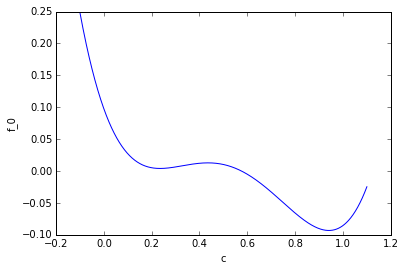

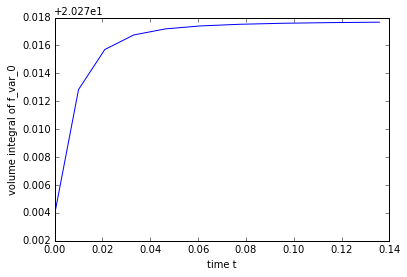

In [5]:
plotf_c()

plt.figure(3)
plt.xlabel('time t')
plt.ylabel('volume integral of f_var_0')
plt.plot(time_list, f_var_list)
plt.show()

In [6]:
np.savetxt('myfile.txt', [1,2,3])

In [7]:
mylist = np.loadtxt('myfile.txt')

In [8]:
print mylist

[ 1.  2.  3.]


In [9]:
!more myfile.txt

1.000000000000000000e+00
2.000000000000000000e+00
3.000000000000000000e+00


In [10]:
zip(a,b)

[(0, 3), (1, 4), (2, 5)]

In [13]:
energylist = np.loadtxt('free_energy.txt')

In [14]:
!more free_energy.txt

1.000000000000000021e-02 2.027387893219743731e+01
2.100000000000000130e-02 2.028283943843626247e+01
3.310000000000000442e-02 2.028571297868668921e+01
4.641000000000000680e-02 2.028675649350422105e+01
6.105100000000000804e-02 2.028719224084894179e+01
7.715610000000000523e-02 2.028740321140448088e+01
9.487171000000001186e-02 2.028751997930469386e+01
1.143588810000000233e-01 2.028759168265026958e+01
1.357947691000000456e-01 2.028763904049626632e+01
1.593742460100000535e-01 2.028767188732295779e+01


In [7]:
import fipy as fp

m = fp.Grid2D(nx=3, ny=3, dx=0.5, dy=2.0)
v = fp.CellVariable(mesh=m)
v[:] = [1, 2, 3, 4, 5, 6, 7, 8, 9]
print v
print v.grad
print v.grad.mag
print (v.grad[0]**2 + v.grad[1]**2)**0.5

[ 1.  2.  3.  4.  5.  6.  7.  8.  9.]
[[ 1.    2.    1.    1.    2.    1.    1.    2.    1.  ]
 [ 0.75  0.75  0.75  1.5   1.5   1.5   0.75  0.75  0.75]]
[ 1.25        2.13600094  1.25        1.80277564  2.5         1.80277564
  1.25        2.13600094  1.25      ]
[ 1.25        2.13600094  1.25        1.80277564  2.5         1.80277564
  1.25        2.13600094  1.25      ]
